In [1]:
# loding the libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
import sys
sys.path.append('/home/theghost001/Pictures/practice_with_H/.py')

#  import logger
from logger import get_logger, log_function


In [12]:
# Initialize logger
logger = get_logger("project_logger", "project.log")


In [4]:
logger.info("Loading the data")

In [5]:
#  will do (1-15) on the data
#1. univariate analysis
#2. bivariate analysis
#3. multivariate analysis
#4. missing values
#5. outliers
#6. feature engineering
#7. feature selection
#8. model building
#9. model evaluation
#10. model deployment
#11. model monitoring
#12. model retraining
#13. model tuning
#14. model optimization
#15. model scaling

In [16]:
# # uploading data on the sqlite3 db for storage and further analysis
# import sqlite3
# #files
# csv_file = "/home/theghost001/Pictures/practice_with_H/data/combined_data.csv"
# db_file = "/home/theghost001/Pictures/practice_with_H/data/data.db"
# # connection to the sqlite3 
# con = sqlite3.connect(db_file)
# print("Connection to the sqlite3 db is successful")
# # reading the csv file into dataFrame
# df = pd.read_csv(csv_file)
# print("CSV file read into the dataFrame successfully")
# # saving the data into the sqlite3 db
# table_name = "travelData"
# df.to_sql(table_name, con, if_exists="replace",index=False)
# print("Data saved into the sqlite3 db successfully")

# uploading data on the sqlite3 db for storage and further analysis with logging also

@log_function(logger)
def connection_to_db(db_path):
    con = sqlite3.connect(db_path)
    return con

@log_function(logger)
def load_data_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    return df

@log_function(logger)
def save_data_to_db(con, df, table_name,index = False):
    df.to_sql(table_name, con, if_exists="replace", index=False)

# main()
try:
    logger.info("Loading the data into sqlite3 db")

    db_path = "/home/theghost001/Pictures/practice_with_H/data/data.db"
    csv_path = "/home/theghost001/Pictures/practice_with_H/data/combined_data.csv"
    table_name = "travelData"

    #making connection to the sqlite3 db
    # con = connection_to_db(db_path)
    # df = load_data_from_csv(csv_path)
    # save_data_to_db(con, df, table_name)

    with sqlite3.connect(db_path) as con:
        df = load_data_from_csv(csv_path)
        save_data_to_db(con = con, df = df, table_name = table_name,index=False)


    logger.info("Data loaded into sqlite3 db successfully")
except Exception as e:
    logger.error(f"Error: {str(e)}")
    raise
finally:
    if 'con' in locals():
        con.close()
        logger.info("Connection to the sqlite3 db closed successfully")
        



In [24]:
#testing the connection to the sqlite3 db
db_path = "/home/theghost001/Pictures/practice_with_H/data/data.db"

con = sqlite3.connect(db_path)
cursor = con.cursor()

cursor.execute("SELECT * FROM travelData LIMIT 1")
print(cursor.fetchall())
print(type(cursor.fetchall()))

con.close()

[(200000, '1984-01', 1, 41.0, 'Self Enquiry', 3, 6.0, 'Salaried', 3.0, '2015-04-28', 28, 4, 2015, 'SE', 3.0, 'Deluxe', 3.0, 'Single', 1.0, 1, 2, 1, 'Manager', 20993.0, 'Female', 'FS', 0)]
<class 'list'>


In [31]:
#testing the connection to the sqlite3 db
db_path = "/home/theghost001/Pictures/practice_with_H/data/data.db"

con = sqlite3.connect(db_path)
cursor = con.cursor()

cursor.execute("SELECT * FROM travelData")
data = cursor.fetchall()

column_names = [description[0] for description in cursor.description]

df = pd.DataFrame(data,columns=column_names)
con.close()

In [33]:
df.shape

(4888, 27)

## 1. Univariate Analysis

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   DateOfBirth(age)        4888 non-null   object 
 2   ProdTaken               4888 non-null   int64  
 3   Age                     4888 non-null   float64
 4   TypeofContact           4888 non-null   object 
 5   CityTier                4888 non-null   int64  
 6   DurationOfPitch         4888 non-null   float64
 7   Occupation              4888 non-null   object 
 8   Totalvisiting           4888 non-null   float64
 9   DateofBirth             4888 non-null   object 
 10  Date(birth)             4888 non-null   int64  
 11  Month(birth)            4888 non-null   int64  
 12  Year(birth)             4888 non-null   int64  
 13  TypeofContact(Allias)   4888 non-null   object 
 14  NumberOfFollowups       4888 non-null   

In [49]:
#total features
print(f"total features in df travelData is {df.shape[1]}")
#total numerical features
print(f"total numerical features in df travelData is {df.select_dtypes(include='number').shape[1]}")
#total categorical features
print(f"total categorical features in the df travelData is {df.select_dtypes(include='object').shape[1]}")

total features in df travelData is 27
total numerical features in df travelData is 17
total categorical features in the df travelData is 10


In [51]:
#list all the features that have object as dtype
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
categorical_features

['DateOfBirth(age)',
 'TypeofContact',
 'Occupation',
 'DateofBirth',
 'TypeofContact(Allias)',
 'ProductPitched',
 'MaritalStatus',
 'Designation',
 'Gender',
 'MaritalStatus(Allias)']

In [53]:
# 1. univariate analysis for categorical features 
'''
1.Frequency Count: Count unique values and their frequencies.
2.Proportions: Calculate percentages for each category.
3.Visualization: Use bar plots to display the distribution.

'''

[]

In [56]:
def univariate_analysis_categorical_features(df, categorical_features):
    for feature in categorical_features:
        print(f"Analysis for : {feature}")
        print('*'*30)

        # counting the feaq
        count = df[feature].value_counts()
        print(f'frequency count: {count}')

        #proportion
        proportion =  df[feature].value_counts(normalize = True) *100
        print(f"proportion is: {proportion}")


        #visualize
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, data=df, palette="viridis")
        plt.title(f"Distribution of {feature}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()



Analysis for : DateOfBirth(age)
******************************
frequency count: DateOfBirth(age)
1989-01    457
1990-01    237
1991-01    211
1994-01    203
1995-01    199
1993-01    197
1992-01    189
1988-01    185
1996-01    178
1987-01    176
1984-01    155
1986-01    150
1997-01    147
1985-01    146
1983-01    142
1998-01    138
1982-01    130
1979-01    121
1980-01    116
1999-01    106
1981-01    105
1974-01     90
1978-01     88
1975-01     86
2000-01     74
1973-01     68
1972-01     66
1976-01     65
1977-01     65
1970-01     64
1971-01     61
1969-01     58
2001-01     56
2002-01     46
2003-01     46
1966-01     44
2004-01     41
2005-01     38
2006-01     32
1967-01     31
1968-01     29
1965-01     29
2007-01     14
1964-01      9
Name: count, dtype: int64
proportion is: DateOfBirth(age)
1989-01    9.349427
1990-01    4.848609
1991-01    4.316694
1994-01    4.153028
1995-01    4.071195
1993-01    4.030278
1992-01    3.866612
1988-01    3.784779
1996-01    3.641571
1987-

/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


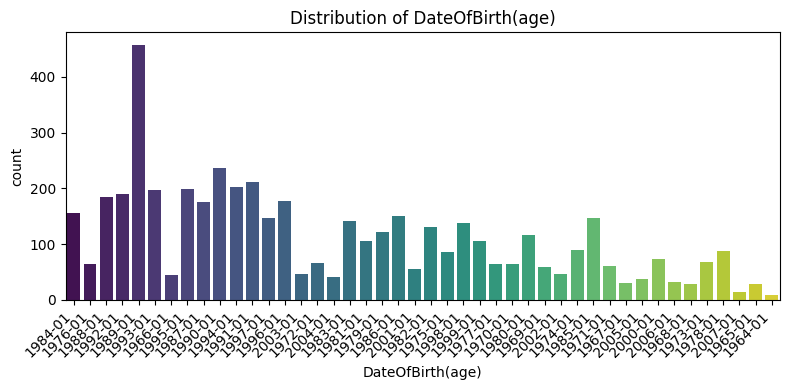

Analysis for : TypeofContact
******************************
frequency count: TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
proportion is: TypeofContact
Self Enquiry       70.969722
Company Invited    29.030278
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


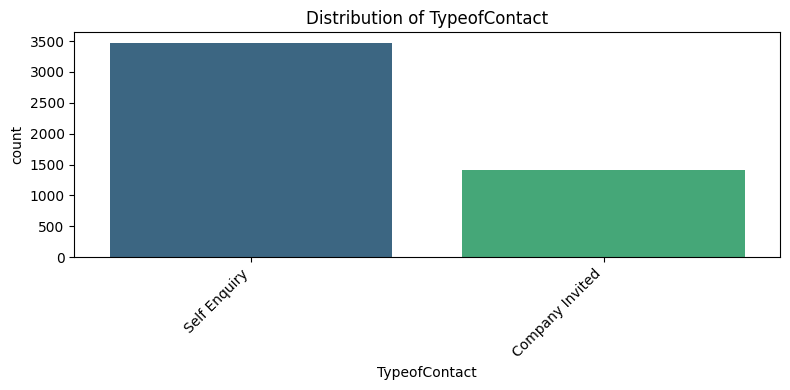

Analysis for : Occupation
******************************
frequency count: Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
proportion is: Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


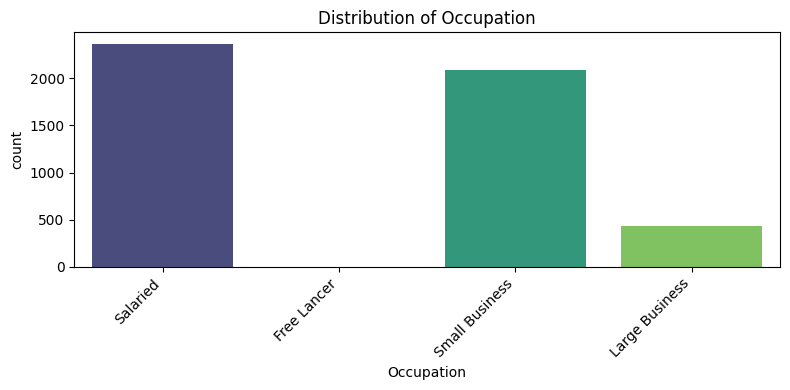

Analysis for : DateofBirth
******************************
frequency count: DateofBirth
2014-09-01    9
2015-10-28    9
2013-02-09    9
2015-12-03    8
2013-12-09    8
             ..
2014-11-05    1
2012-03-19    1
2010-10-18    1
2013-05-19    1
2014-12-30    1
Name: count, Length: 1947, dtype: int64
proportion is: DateofBirth
2014-09-01    0.184124
2015-10-28    0.184124
2013-02-09    0.184124
2015-12-03    0.163666
2013-12-09    0.163666
                ...   
2014-11-05    0.020458
2012-03-19    0.020458
2010-10-18    0.020458
2013-05-19    0.020458
2014-12-30    0.020458
Name: proportion, Length: 1947, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


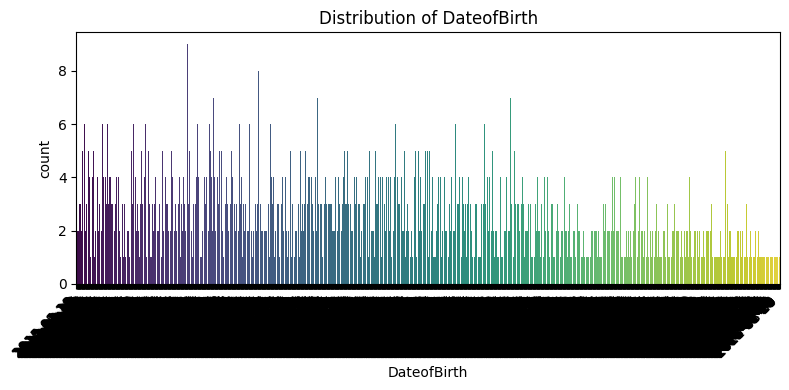

Analysis for : TypeofContact(Allias)
******************************
frequency count: TypeofContact(Allias)
SE    3469
CI    1419
Name: count, dtype: int64
proportion is: TypeofContact(Allias)
SE    70.969722
CI    29.030278
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


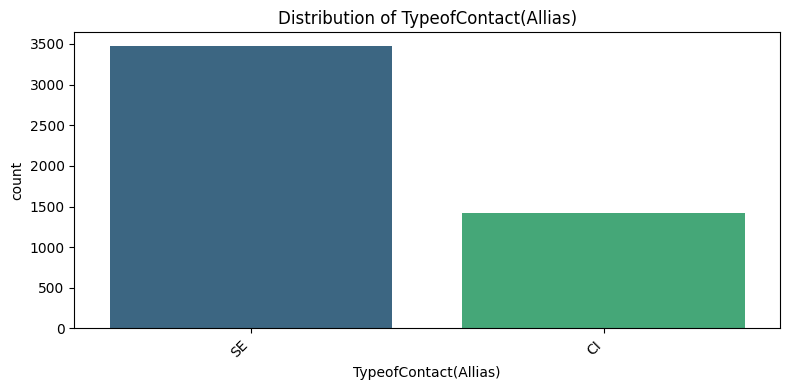

Analysis for : ProductPitched
******************************
frequency count: ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
proportion is: ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


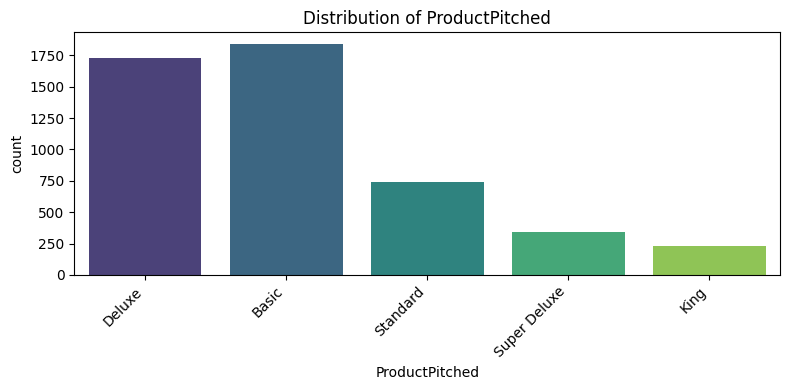

Analysis for : MaritalStatus
******************************
frequency count: MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
proportion is: MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


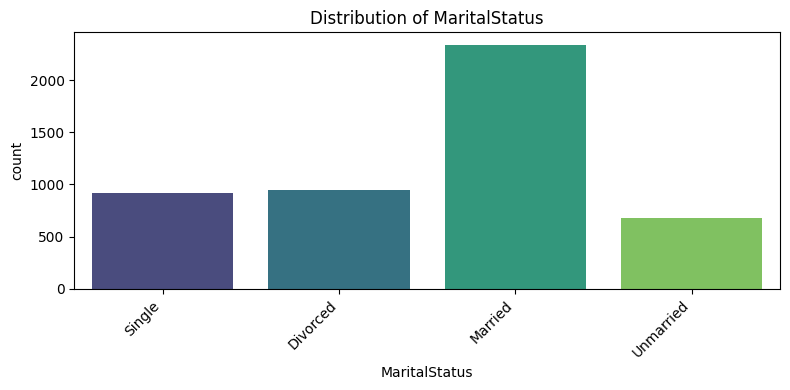

Analysis for : Designation
******************************
frequency count: Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
proportion is: Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


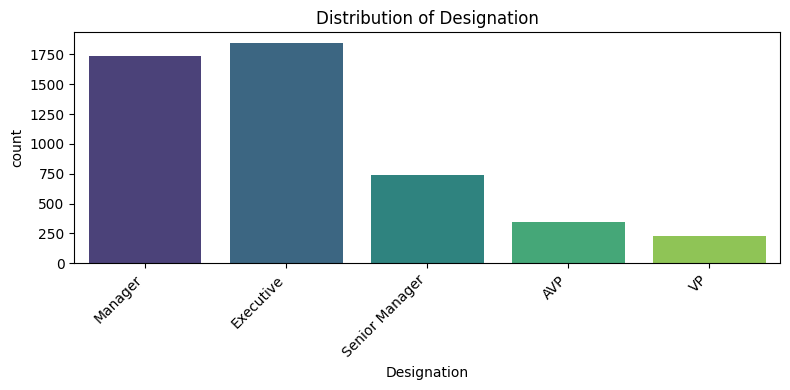

Analysis for : Gender
******************************
frequency count: Gender
Male      2916
Female    1972
Name: count, dtype: int64
proportion is: Gender
Male      59.656301
Female    40.343699
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


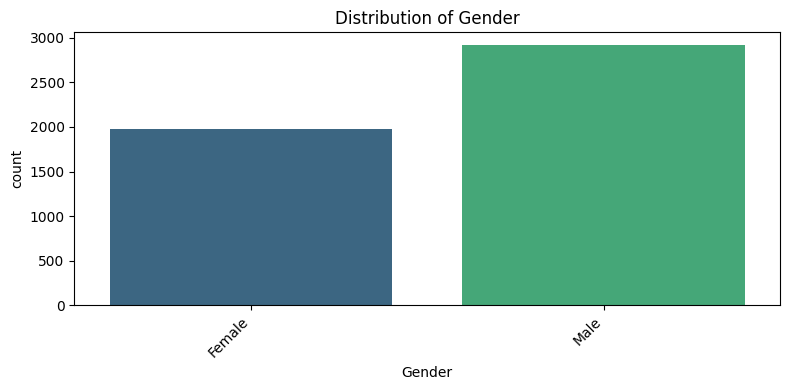

Analysis for : MaritalStatus(Allias)
******************************
frequency count: MaritalStatus(Allias)
MM    1444
FM     896
MD     564
MS     529
FS     387
FD     386
MU     379
FU     303
Name: count, dtype: int64
proportion is: MaritalStatus(Allias)
MM    29.541735
FM    18.330606
MD    11.538462
MS    10.822422
FS     7.917349
FD     7.896890
MU     7.753682
FU     6.198854
Name: proportion, dtype: float64


/tmp/ipykernel_46338/1075197896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


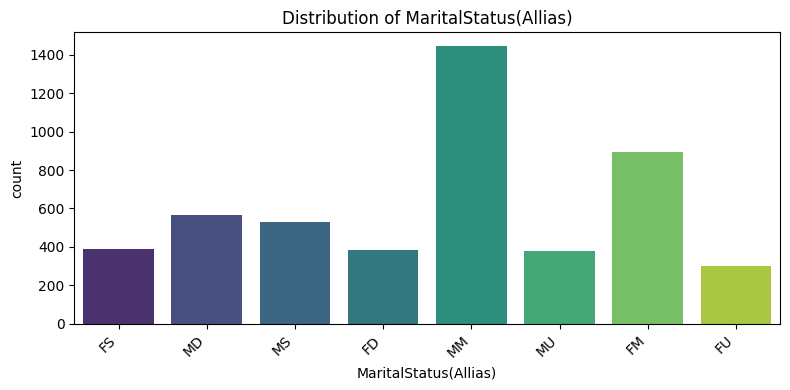

In [57]:
univariate_analysis_categorical_features(df, categorical_features)